# Sentiment Analysis / Emotion Mining on one of Elon Musk's tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

In [2]:
elonmusk= pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\Desktop\\Excelr Assignments\\Text Mining\\Elon_musk.csv",encoding='cp1252')
elonmusk

,text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
#elonmusk1=elonmusk.drop(['sno.'],axis=1)
#elonmusk1

# Data Cleaning

In [4]:
elonmusk.text

0                                  @kunalb11 I’m an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: text, Length: 1999, dtype: object

In [5]:
from wordcloud import WordCloud , STOPWORDS
import spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download en


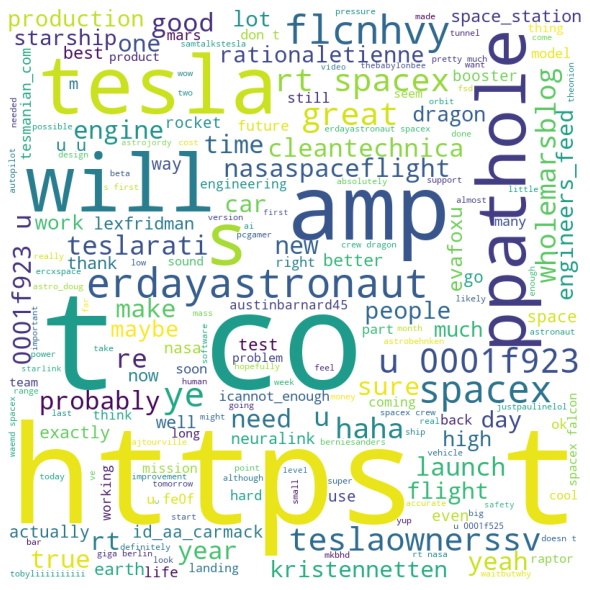

In [6]:
#Creating Word Cloud which will show the Words frequently used will be in big Sixe and words with less frequency are small in size 
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in elonmusk.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

 

In [7]:
#Parts Of Speech Tagging
nlp= spacy.load('en_core_web_sm')
one_block=elonmusk.text[566]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [8]:
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [9]:
for token in doc_block:
    print(token,token.pos_)

This PRON
is AUX
a DET
life NOUN
leader NOUN
launch NOUN
, PUNCT
so ADV
more ADJ
risk NOUN
than ADP
normal ADJ
https://t.co/EtFP9IELrf NOUN


In [10]:
#Filtering for nouns and verbs only
noun_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN' , 'VERB')]
print(noun_verbs)

['life', 'leader', 'launch', 'risk', 'https://t.co/EtFP9IELrf']


In [11]:
#Counting tokens again

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


X= cv.fit_transform(noun_verbs)
sum_words= X.sum(axis=0)
word_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
word_freq= sorted(word_freq, key=lambda x: x[1], reverse= True)
wf_df=pd.DataFrame(word_freq)
wf_df.columns= ['word','count']
wf_df

,word,count
0,life,1
1,leader,1
2,launch,1
3,risk,1
4,https,1
5,co,1
6,etfp9ielrf,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

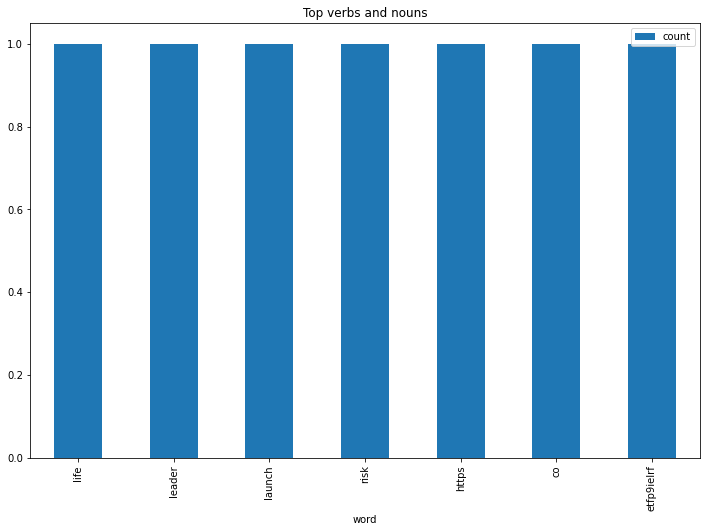

In [12]:
##Visualizing results
#Barchart for  nouns + verbs of a sentence
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# Sentiment Analysis

In [13]:
#pip install nltk

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MOHD
[nltk_data]     SHOEB\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
#importing affin csv in which there are scores for words giving by well known psychiatrists
afinn=pd.read_csv('C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Text Mining\\Afinn.csv',sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [16]:
import pandas as pd 
import numpy as np
import string
import spacy

from matplotlib.pyplot import imread
import matplotlib.pyplot as plt


elonmusk= pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Text Mining\\Elon_musk.csv",encoding='cp1252')
elonmusk=[text.strip() for text in elonmusk.text]  # remove both the leading and the trailing characters
elonmusk=[text for text in elonmusk if text] # removes empty strings, because they are considered in Python as False
elonmusk

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [17]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(elonmusk))
sentences

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [18]:
elonmusk_df=pd.DataFrame(elonmusk, columns=['sentences'])
elonmusk_df

,sentences
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [19]:
affinity_scores= afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [20]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment (text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [21]:
# test that it works
calculate_sentiment(text='amazing')

4

In [22]:
elonmusk_df['sentiment_value'] = elonmusk_df['sentences'].apply(calculate_sentiment)

In [23]:
# how many words are in the sentence?
elonmusk_df['word_count']=elonmusk_df['sentences'].str.split().apply(len)
elonmusk_df['word_count']

0        4
1       13
2        4
3        4
4       17
        ..
1994    23
1995    12
1996     4
1997     7
1998     4
Name: word_count, Length: 1999, dtype: int64

In [24]:
elonmusk_df.sort_values(by='sentiment_value',ascending=False)

,sentences,sentiment_value,word_count
1388,"@GerberKawasaki Wow, I super loved astronomy (...",12,20
1304,"One way or another, excitement guaranteed! Sup...",11,17
1172,Thanks Tesla Team for great work on deliveries...,10,20
468,@picot_john @CyberpunkGame It’s a good to grea...,10,20
458,@teslaownerssv It will get absurdly good. Tesl...,10,18
...,...,...,...
1393,@l_vaux @kulpability @tlowdon @EthicalSkeptic ...,-5,16
1717,@Neuro_Skeptic They don’t fire all at once. So...,-6,20
1015,@enn_nafnlaus There are sketchy edits to Tesla...,-6,17
1637,@TimothyBuffett @Teslarati Apart from failing ...,-6,17


In [25]:
# Sentiment score of the whole review
elonmusk_df['sentiment_value'].describe()

count    1999.000000
mean        0.635318
std         1.725848
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [26]:
elonmusk_df[elonmusk_df['sentiment_value']<0]

,sentences,sentiment_value,word_count
3,@gtera27 Doge is underestimated,-1,4
6,"Frodo was the underdoge,\nAll thought he would...",-2,14
15,"@JoshManMode He definitely has issues, but the...",-2,12
20,@freewalletorg Any crypto wallet that won’t gi...,-1,17
21,@freewalletorg Your app sucks,-3,4
...,...,...,...
1975,@RationalEtienne @flcnhvy @PPathole @IheartTes...,-3,10
1976,@thatt3slaguy @flcnhvy @PPathole @IheartTesla ...,-1,16
1990,"@kenyanwalstreet Not actually a payout, just a...",-1,22
1991,@IheartTesla No easy way to answer this in a t...,-3,23


In [27]:
elonmusk_df[elonmusk_df['sentiment_value']>0]

,sentences,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
4,@teslacn Congratulations Tesla China for amazi...,4,17
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),2,6
9,The most entertaining outcome is the most likely,2,8
11,Just agree to do Clubhouse with @kanyewest,1,7
...,...,...,...
1987,@PPathole @IheartTesla For sure. This is both ...,3,19
1988,@redmercy Yes,1,2
1989,"@buzzindelhi Sorry, should hopefully be soon!",1,6
1995,@PPathole Make sure to read ur terms &amp; con...,1,12


C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

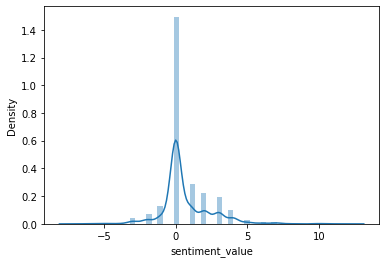

In [28]:
#From this distplot we can see that there is slight positive impact of the tweet posted by Elon Musk and most of the comments are neutral which is neither -ve impact nor +ve impact
import seaborn as sns
sns.distplot(elonmusk_df['sentiment_value'])

In [29]:
elonmusk_df['sentiment_value'].sum(axis=0)

1270

In [30]:
elonmusk_df['index']=range(0,len(elonmusk_df))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

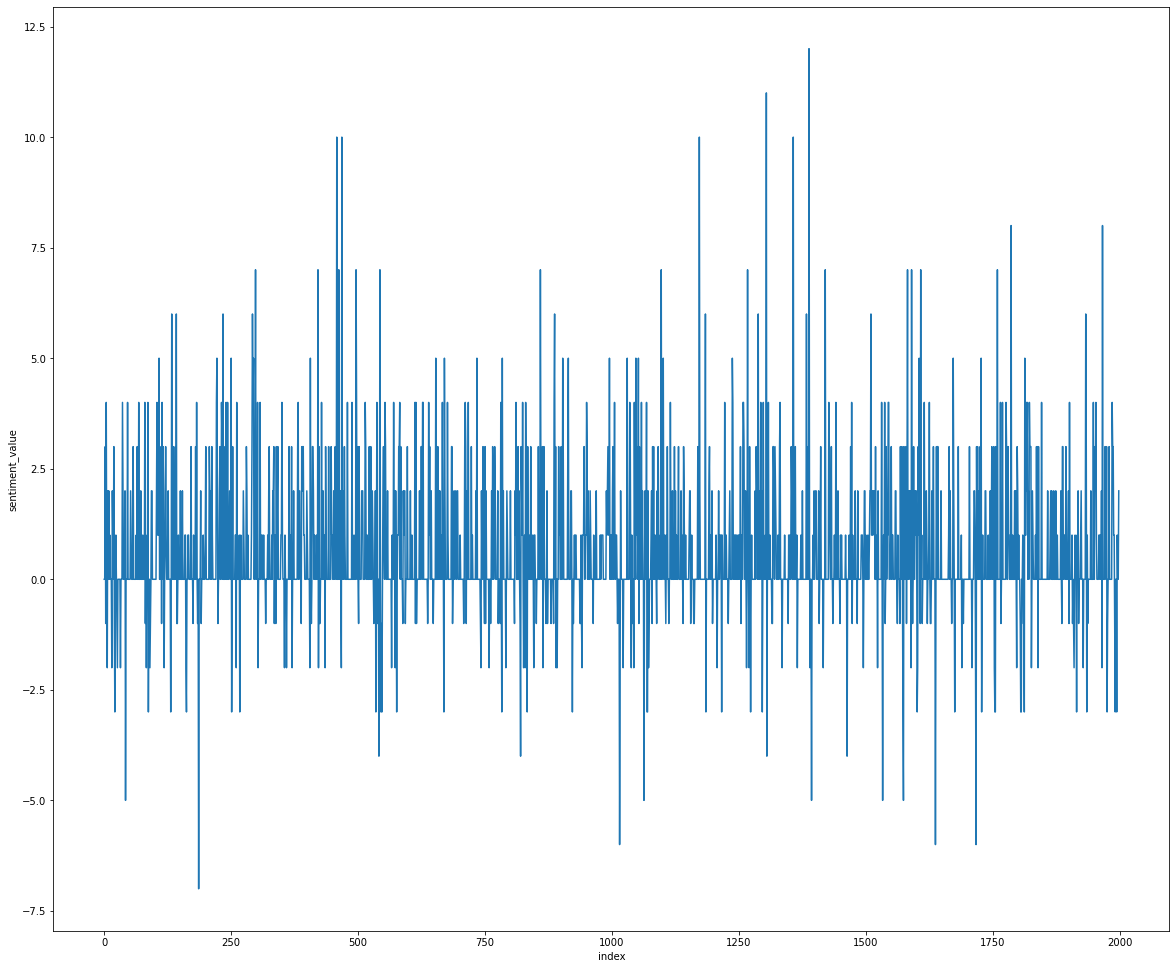

In [31]:
plt.figure(figsize=(20,17))
sns.lineplot(y='sentiment_value', x='index',data=elonmusk_df)